# Non linear feature extraction of the stratosphere

- https://github.com/geopandas/geopandas/issues/1166

## Data exploration:

In [1]:
#imports:

import pandas as pd
import numpy as np

import geopandas
import geoplot
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


### Load data: 

In [2]:
anomalies_cf = pd.read_csv('../data/anomalies_coefficients.csv', sep = ',')
raw_cf = pd.read_csv('../data/raw_data_coefficients.csv', sep = ',')
basis_cv = pd.read_csv('../data/basis_functions.csv', sep = ',')

In [3]:
basis_cv.head(3)

,Unnamed: 0,Lon,Lat,X1,X2,X3,X4,X5,X6,X7,...,X992,X993,X994,X995,X996,X997,X998,X999,X1000,X1001
0,1,0.00,89.25,1,0.010141,0.040319,-2.368483,0.001031,0.000077,-0.102981,...,3.631613e-13,3.464664e-14,-3.341165e-13,2.849425e-13,1.557925e-13,5.982969e-13,6.331329e-13,2.241741e-13,-2.846185e-13,-5.775125e-13
1,2,0.75,89.25,1,0.009612,0.040449,-2.368483,0.001029,0.000104,-0.101771,...,4.067050e-13,-4.938318e-16,-3.507720e-13,2.985671e-13,1.810982e-13,5.570756e-13,6.526212e-13,1.829743e-13,-3.911114e-13,-5.002182e-13
2,3,1.50,89.25,1,0.009082,0.040571,-2.368483,0.001026,0.000131,-0.100545,...,3.982352e-13,-3.830620e-14,-4.210252e-13,2.607462e-13,1.647441e-13,5.954190e-13,6.264252e-13,2.505362e-13,-4.883408e-13,-3.861563e-13


In [4]:
raw_cf.head(3)

,Unnamed: 0,Date,X1,X2,X3,X4,X5,X6,X7,X8,...,X992,X993,X994,X995,X996,X997,X998,X999,X1000,X1001
0,1,1979-01-01 00:00:00,0.000443,0.000059,0.000018,-0.000257,0.000027,0.000018,-0.000047,-0.000025,...,1.326600e-06,-2.590231e-07,1.111734e-06,-7.988864e-07,4.408012e-08,-1.217306e-08,9.282409e-07,-5.001676e-07,-4.883183e-08,1.128947e-06
1,2,1979-01-01 06:00:00,0.000436,0.000057,0.000017,-0.000250,0.000028,0.000011,-0.000043,-0.000030,...,3.176703e-07,-2.685431e-07,5.769547e-08,6.127967e-07,4.295968e-08,-7.938383e-08,1.063049e-06,-5.364016e-07,7.481122e-07,2.706997e-07
2,3,1979-01-01 12:00:00,0.000434,0.000058,0.000010,-0.000249,0.000034,0.000009,-0.000043,-0.000029,...,1.135065e-06,-1.217742e-06,1.196999e-07,-2.562468e-07,-6.708924e-08,7.292826e-08,1.581833e-07,-4.967490e-07,-8.876771e-08,-9.832148e-07


In [5]:
anomalies_cf.head(3)

,Unnamed: 0,Date,X1,X2,X3,X4,X5,X6,X7,X8,...,X992,X993,X994,X995,X996,X997,X998,X999,X1000,X1001
0,1,1979-01-01 00:00:00,0.087772,0.306971,-0.358278,-0.713848,0.431876,0.233288,0.079006,0.182841,...,0.010085,0.000343,0.013018,-0.008956,0.001028,-0.000141,0.009586,-0.004209,0.000906,0.011727
1,2,1979-01-01 06:00:00,0.045790,0.298297,-0.373760,-0.684706,0.456666,0.171122,0.098944,0.153985,...,0.004224,-0.002052,0.002568,0.003769,0.000829,-0.001214,0.010168,-0.005202,0.007966,0.002296
2,3,1979-01-01 12:00:00,0.044001,0.297177,-0.449389,-0.679847,0.513206,0.161827,0.082390,0.152011,...,0.009204,-0.010951,0.000831,-0.004194,-0.000835,0.001100,-0.000148,-0.005812,0.000562,-0.005325


In [6]:
# Look at small sample of data:
sample_anomaly = anomalies_cf.sample(1)
sample_anomaly_array = np.array(
    sample_anomaly.drop(['Unnamed: 0', 'Date'], axis=1))

basis_array = np.array(basis_cv.drop(['Unnamed: 0', 'Lon', 'Lat'], axis=1))

print(
    f'Coordinates shape:{sample_anomaly_array.shape} and Basis array shape:{basis_array.shape}'
)

Coordinates shape:(1, 1001) and Basis array shape:(38400, 1001)


In [7]:
"""
@input: 
- basis np.array of shape (1001, 38400)
- coordinates np.array of shape (1001, 1)
"""
def basis_transf(coordinates, basis):
    x = np.zeros(38400)
    if coordinates.shape== (1,1001):
        coordinates = coordinates.T
    if basis.shape == (38400,1001):
        basis = basis.T
    for i in range(len(coordinates)):
        x += coordinates[i]*basis[i]
    return x

In [8]:
# Apply basis transformation to sample point: 
X_sample = pd.DataFrame(
    data={
        'longitude': basis_cv['Lon'],
        'latitude': basis_cv['Lat'],
        'PV_values': basis_transf(sample_anomaly_array, basis_array)
    })
X_sample

,longitude,latitude,PV_values
0,0.00,89.25,-1.836144
1,0.75,89.25,-1.834905
2,1.50,89.25,-1.833666
3,2.25,89.25,-1.832428
4,3.00,89.25,-1.831191
...,...,...,...
38395,356.25,30.00,-0.666654
38396,357.00,30.00,-0.684326
38397,357.75,30.00,-0.691786
38398,358.50,30.00,-0.688536


<AxesSubplot:>

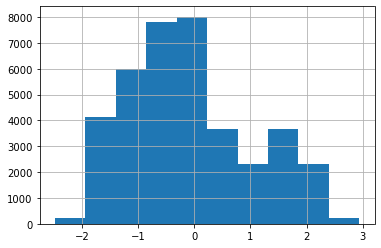

In [9]:
# Look at PV_values: 
X_sample['PV_values'].hist()

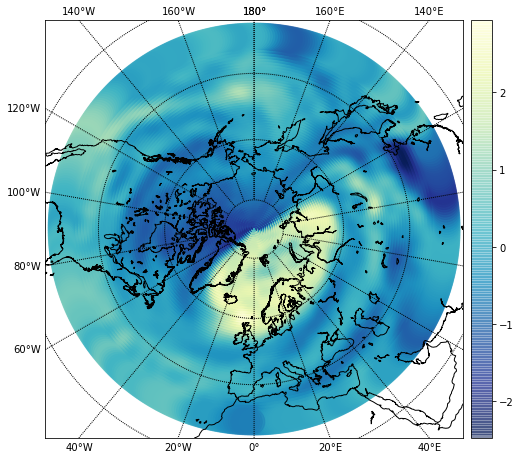

In [21]:
lat=X_sample.latitude.values
lon=X_sample.longitude.values
PV_values = X_sample.PV_values.values
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='npstere', boundinglat=26,lon_0=0,resolution='l')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.), labels=[False,False,False,False])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,True,True])

m.scatter(lon,lat, latlon=True,
          c=PV_values,s=700,
          cmap='YlGnBu_r', alpha=0.5)
m.colorbar()

In [22]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=10)
pca.fit(X)